# Assignment-2
By K. Sai Somanath, 18MCMT28, M.Tech, CS.

## Question 1
Implmenting a ordered color dithering algorithm

The mask used is inspired form the Bayers mask. The image is intially filled white color(255,255,255). Over that, the CMY colors are used. 

The image is scaled by 4 times.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [2]:
def color_dithering(image):
    output_img = np.full((image.shape[0]*4, image.shape[1]*4, 3), 255,np.uint8)    

    # Locations fo each color component
    c_ind = [[0,1],[0,3],[2,1],[2,2],[2,3]] 
    m_ind = [[0,2],[1,1],[1,3],[3,1],[3,3],[2,0]]
    y_ind = [[0,0],[1,0],[1,2],[3,0],[3,2]]
    (heigth, width) = image.shape[:2]
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            c_val = 255 - image[i,j,2]
            m_val = 255 - image[i,j,1]
            y_val = 255 - image[i,j,0]
            
            # Find number of dots to be set for C,M,Y using unitary method 
            c_dots = ( len(c_ind) * c_val ) // 255
            m_dots = ( len(m_ind) * m_val ) // 255
            y_dots = ( len(y_ind) * y_val ) // 255
            
            x,y = i*4, j*4
            for k in range(c_dots): # for cyan, set B and G 
                output_img[x + c_ind[k][0],y + c_ind[k][1]] = [255,255,0]

            for k in range(m_dots): # for magenta, set B and R
                output_img[x + m_ind[k][0],y + m_ind[k][1]] = [255,0,255]
            
            for k in range(y_dots): # for yellow, set G and R
                output_img[x + y_ind[k][0],y + y_ind[k][1]] = [0,255,255]
                
                
    plt.imshow(cv2.cvtColor(output_img,cv2.COLOR_BGR2RGB))
    plt.show()
    # Save in the current directory
    cv2.imwrite('Dithered.jpg', output_img)
    print('Image saved in current directory')
    return

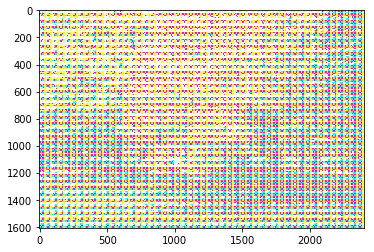

Image saved in current directory


In [3]:
image = cv2.imread('Images/fall-colours.jpg')
color_dithering(image)

## Question 2

In [4]:
def my_dithering(in_image):
    image = cv2.copyMakeBorder(in_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    (x, y, z) = image.shape
    for k in range(z):
        for i in range(1, x-1):
            for j in range(1, y-1):
                    old_pixel = image[i][j][k]
                    new_pixel = 255 * math.floor(old_pixel / 128)
                    image[i][j][k] = new_pixel
                    error = old_pixel - new_pixel
                    image[i + 1][j    ][k] = image[i + 1][j    ][k] + error * (5 / 10.)
                    image[i - 1][j + 1][k] = image[i - 1][j + 1][k] + error * (5 / 10.)
    return image

In [5]:
def floyd_dithering(in_image):
    image = cv2.copyMakeBorder(in_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    (x, y, z) = image.shape
    print(image.dtype)
    for k in range(z):
        for i in range(1, x-1):
            for j in range(1, y-1):
                old_pixel = image[i][j][k]
                new_pixel = 255 * math.floor(old_pixel / 128)
                image[i][j][k] = new_pixel
                error = old_pixel - new_pixel
                image[i + 1][j    ][k] = image[i + 1][j    ][k] + error * (7 / 16.)
                image[i - 1][j + 1][k] = image[i - 1][j + 1][k] + error * (3 / 16.)
                image[i    ][j + 1][k] = image[i    ][j + 1][k] + error * (5 / 16.)
                image[i + 1][j + 1][k] = image[i + 1][j + 1][k] + error * (1 / 16.)
    return image

(400, 640, 3)


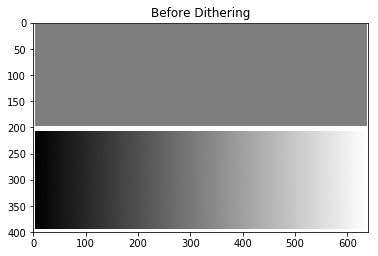

uint8
Type: uint8


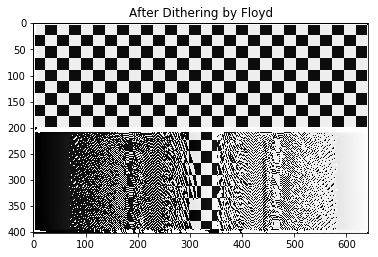

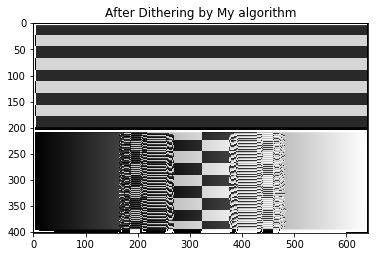

In [6]:
image = cv2.imread('Images/ed-eg.png')
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Before Dithering')
plt.show()
img = floyd_dithering(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print('Type:', img.dtype)
plt.imshow(img, cmap="gray")
cv2.imwrite('Floyd.jpg', img)
plt.title('After Dithering by Floyd')
plt.show()
my_img = my_dithering(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite('My.jpg', my_img)
plt.imshow(my_img)
plt.title('After Dithering by My algorithm')
plt.show()

### Observations
**1. Upper section**
    * Flyods method produces a squared pattern in the upper section of the image
    * My dithering algorithm gives a stipe pattern in the upper section, due to the choice of the direction of the error diffusion


**2. Lower section**
    * Floyd's algorithm seems to produce various pattern at various gray levels. We can see the checkboard pattern around 128 gray level.
    * My algorithm produces a stipe pattern at ariund 128 gray levels. It does not produces any patterns at the extreme values. It then gives out a horizontal stripe pattern which are varying in intesity on either side of the of the 128 gray levels.

## Question 3
**Implement an algorithm to simulate the grayscale output from a colour filter array.**

In [7]:
def masks(shape, pattern):
    pattern = pattern.upper()

    channels = dict((channel, np.zeros(shape)) for channel in 'RGB')
    for channel, (y, x) in zip(pattern, [(0, 0), (0, 1), (1, 0), (1, 1)]):
        channels[channel][y::2, x::2] = 1

    return tuple(channels[c].astype(bool) for c in 'RGB')

print(masks((2,2 ), 'RGGB'))

(array([[ True, False],
       [False, False]]), array([[False,  True],
       [ True, False]]), array([[False, False],
       [False,  True]]))


In [8]:
def colour_filter(image, _filter):
    image = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT)
    (height, width, channals) = image.shape
    img_cfa = np.zeros(image.shape[:2])
    r, g, b = masks(image.shape[:2], 'RGGB')      
    img_cfa = image[:,:,0] * r + image[:,:,1] * g + image[:,:,2] * b
    return img_cfa, r, g, b

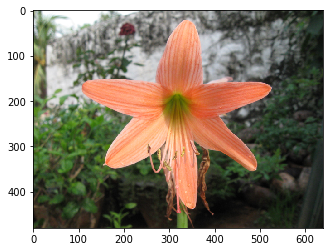

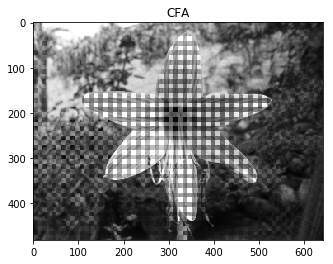

In [9]:
img = cv2.imread('Images/orange-flower.ppm')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
_filter = np.array([[1,2],[0,2]])
output, _r, _g, _b = colour_filter(img, _filter)
plt.imshow(output,cmap='gray')
plt.title('CFA')
plt.show()

**Implement a demosaicking algorithm.**

In [10]:
def bilinear_interpolation(img_pad, isG=False):
    new_image = img_pad.copy()
    conv_rb = np.array(
    [[0.25, 0.5, 0.25],
     [0.5, 1, 0.5],
     [0.25, 0.5, 0.25]])  
    conv_g = np.array(
        [[0, 0.25, 0],
         [0.25, 1, 0.25],
         [0, 0.25, 0]])
    (height, width) = img_pad.shape
    neighbours = [0] * 9
    for i in range(1, height-1):
        for j in range(1, width-1):
            neighbours[0] = img_pad[i-1, j-1]
            neighbours[1] = img_pad[i-1, j]
            neighbours[2] = img_pad[i-1, j+1]
            neighbours[3] = img_pad[i, j-1]
            neighbours[4] = img_pad[i, j]
            neighbours[5] = img_pad[i, j+1]
            neighbours[6] = img_pad[i+1, j-1]
            neighbours[7] = img_pad[i+1, j]
            neighbours[8] = img_pad[i+1, j+1]
            neighbours = np.array(neighbours).reshape(3, 3)
            if isG is True:
                new_image[i,j] = (neighbours * conv_g).sum()
            else:
                new_image[i,j] = (neighbours * conv_rb).sum()
            neighbours = neighbours.flatten()
            
    return new_image

def demosaic(image_cfa, _filter):
    r, g, b = masks(image_cfa.shape, _filter)
    return np.stack((bilinear_interpolation(image_cfa * r),
                           bilinear_interpolation(image_cfa * g, True),
                           bilinear_interpolation(image_cfa * b)), axis=2)
    
                        

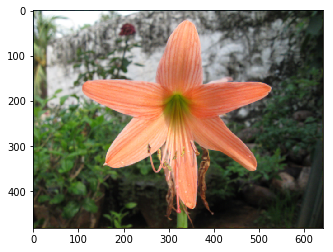

In [11]:
color_img = demosaic(output, 'RGGB')
plt.imshow(color_img)
plt.show()